In [26]:
import astropy.io.fits as pyfits
from scipy import *
import numpy as np
from pylab import *
import matplotlib as mpl
import matplotlib.pylab as plt
import os

hdulist = pyfits.open('allStar-l30e.2.fits')
idx_all=where( (hdulist[1].data['LOCATION_ID']>1))[0]
idx_noTelluric=where( (hdulist[1].data['LOCATION_ID']>1) & logical_not (hdulist[1].data['APOGEE_TARGET2'] & 2**9))[0]
# Number of Telluric standards = 17293
rvCC = hdulist[1].data['RV_CCFWHM']
rvAUTO = hdulist[1].data['RV_AUTOFWHM']
Teff = hdulist[1].data['TEFF']
idx_Teff5000 = where( (hdulist[1].data['LOCATION_ID']>1) 
                     & (Teff<5000))[0]

idx_Teff5000_noT = where( (hdulist[1].data['LOCATION_ID']>1) 
                     & logical_not (hdulist[1].data['APOGEE_TARGET2'] & 2**9)
                     & (Teff<5000))[0]

idx_SNR10 = where(hdulist[1].data['SNR']>10)[0]
idx_SNR20 = where(hdulist[1].data['SNR']>20)[0]
idx_SNR50 = where(hdulist[1].data['SNR']>50)[0]
idx_SNR100 = where(hdulist[1].data['SNR']>100)[0]

def read_spec(fitsfile):
    hdulist = pyfits.open('spec/'+fitsfile)
    ispec = hdulist[1].data
    if len(ispec.shape)>1:
        ispec=ispec[0]
    lambda0 = hdulist[1].header['CRVAL1']
    delta_lambda = hdulist[1].header['CDELT1']
    shift = hdulist[0].header['VHELIO']
    lambda_arr = 10**(lambda0+arange(len(ispec))*delta_lambda)
    return lambda_arr, ispec

idx_high_noTelluric = where( (rvCC>100) & logical_not (hdulist[1].data['APOGEE_TARGET2'] & 2**9))[0]
seed(10027)
idx_low_noTelluric = where( (rvCC<20) & logical_not (hdulist[1].data['APOGEE_TARGET2'] & 2**9))[0]
seed(10027)


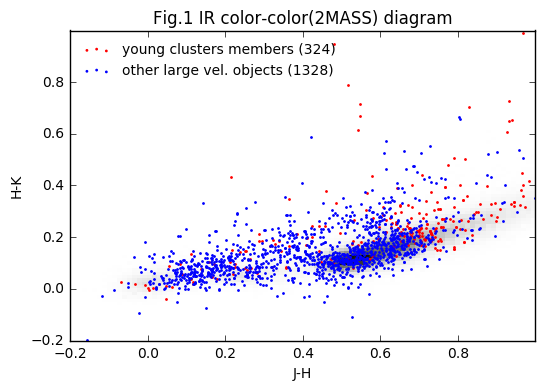

In [12]:
MagJ = hdulist[1].data['J'][idx_high_noTelluric]
MagH = hdulist[1].data['H'][idx_high_noTelluric]
MagK = hdulist[1].data['K'][idx_high_noTelluric]

idx_young_cluster = where((hdulist[1].data['APOGEE_TARGET2'][idx_high_noTelluric] & 2**13)!=0)[0]
idx_not_young_cluster = where((hdulist[1].data['APOGEE_TARGET2'][idx_high_noTelluric] & 2**13)==0)[0]

figure(figsize=(6,4))
hist2d(hdulist[1].data['J']-hdulist[1].data['H'], hdulist[1].data['H']-hdulist[1].data['K'],range=[[-0.3,1],[-0.3,1]],bins=100,cmap='Greys')
scatter( (MagJ-MagH)[idx_young_cluster], (MagH-MagK)[idx_young_cluster], color='r',s=1,label='young clusters members (%i)'%(len(idx_young_cluster)))
scatter( (MagJ-MagH)[idx_not_young_cluster], (MagH-MagK)[idx_not_young_cluster], color='b',s=1,label='other large vel. objects (%s)'%(len(idx_not_young_cluster)))
legend(frameon=0,fontsize=10,loc=2)
title('Fig.1 IR color-color(2MASS) diagram')
xlabel('J-H')
ylabel('H-K')
xlim(-0.2,1)
ylim(-0.2,1)
show()

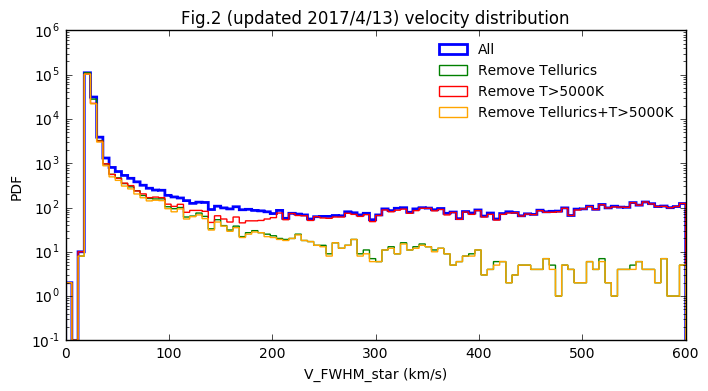

In [27]:
ibins=linspace(0,600,101)
f=figure(figsize=(8,4))
ax=f.add_subplot(111)
ax.hist(rvCC[idx_all], bins=ibins,histtype='step',log=1,lw=2, label='All')
ax.hist(rvCC[idx_noTelluric], bins=ibins,histtype='step',log=1,label='Remove Tellurics')
ax.hist(rvCC[idx_Teff5000], bins=ibins,histtype='step',log=1,label='Remove T>5000K')
ax.hist(rvCC[idx_Teff5000_noT], bins=ibins,histtype='step',color='orange',log=1,label='Remove Tellurics+T>5000K')
#ax.hist(rvCC[idx_SNR], bins=ibins,histtype='step',color=rand(3),log=1,label='SNR>10')


ax.set_title('Fig.2 (updated 2017/4/13) velocity distribution')
ax.set_xlabel('V_FWHM_star (km/s)')
ax.set_ylabel('PDF')
ax.legend(frameon=0, fontsize=10)
show()

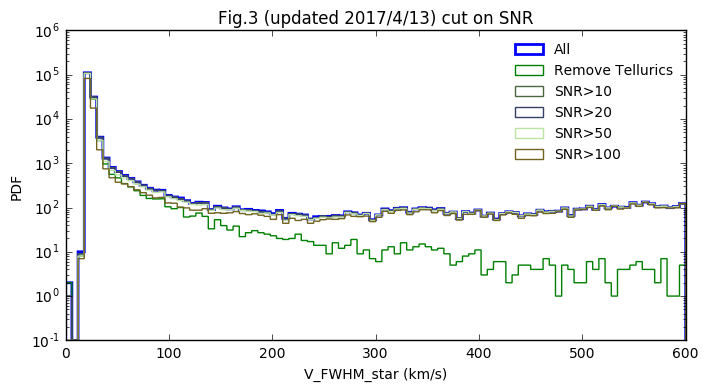

In [28]:
f=figure(figsize=(8,4))
ax=f.add_subplot(111)
ax.hist(rvCC[idx_all], bins=ibins,histtype='step',log=1,lw=2, label='All')
ax.hist(rvCC[idx_noTelluric], bins=ibins,histtype='step',log=1,label='Remove Tellurics')
ax.hist(rvCC[idx_SNR10], bins=ibins,histtype='step',color=rand(3),log=1,label='SNR>10')
ax.hist(rvCC[idx_SNR20], bins=ibins,histtype='step',color=rand(3),log=1,label='SNR>20')
ax.hist(rvCC[idx_SNR50], bins=ibins,histtype='step',color=rand(3),log=1,label='SNR>50')
ax.hist(rvCC[idx_SNR100], bins=ibins,histtype='step',color=rand(3),log=1,label='SNR>100')

ax.set_title('Fig.3 (updated 2017/4/13) cut on SNR')
ax.set_xlabel('V_FWHM_star (km/s)')
ax.set_ylabel('PDF')
ax.legend(frameon=0, fontsize=10)
show()

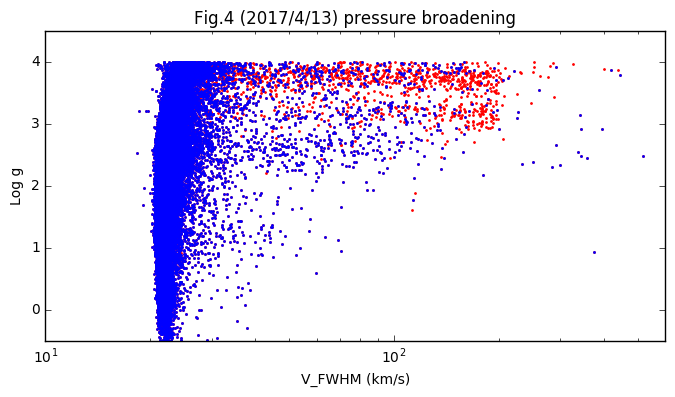

In [43]:
LOGG = hdulist[1].data['LOGG']

f=figure(figsize=(8,4))
ax=f.add_subplot(111)
ax.scatter(rvCC, LOGG,color='r',s=1)
ax.scatter(rvCC[idx_noTelluric], LOGG[idx_noTelluric],color='b',s=1)

ax.set_xscale("log")
ax.set_title('Fig.4 (2017/4/13) pressure broadening')
ax.set_xlabel('V_FWHM (km/s)')
ax.set_ylabel('Log g')
ax.legend(frameon=0, fontsize=10)
ax.set_xlim(10,600)
ax.set_ylim(-0.5,4.5)
show()

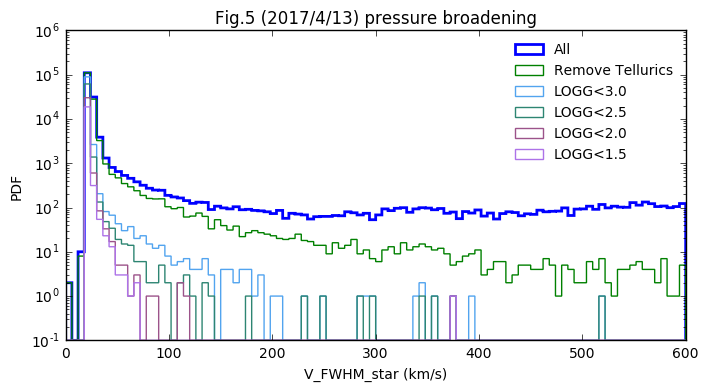

In [42]:
idx_LOGG30 = where( (hdulist[1].data['LOGG']<3) & (hdulist[1].data['LOGG']>-10))[0]
idx_LOGG25 = where( (hdulist[1].data['LOGG']<2.5) & (hdulist[1].data['LOGG']>-10))[0]
idx_LOGG20 = where( (hdulist[1].data['LOGG']<2) & (hdulist[1].data['LOGG']>-10))[0]
idx_LOGG15 = where( (hdulist[1].data['LOGG']<1.5) & (hdulist[1].data['LOGG']>-10))[0]

f=figure(figsize=(8,4))
ax=f.add_subplot(111)
ax.hist(rvCC[idx_all], bins=ibins,histtype='step',log=1,lw=2, label='All')
ax.hist(rvCC[idx_noTelluric], bins=ibins,histtype='step',log=1,label='Remove Tellurics')
ax.hist(rvCC[idx_LOGG30], bins=ibins,histtype='step',color=rand(3),log=1,label='LOGG<3.0')
ax.hist(rvCC[idx_LOGG25], bins=ibins,histtype='step',color=rand(3),log=1,label='LOGG<2.5')
ax.hist(rvCC[idx_LOGG20], bins=ibins,histtype='step',color=rand(3),log=1,label='LOGG<2.0')
ax.hist(rvCC[idx_LOGG15], bins=ibins,histtype='step',color=rand(3),log=1,label='LOGG<1.5')

ax.set_title('Fig.5 (2017/4/13) pressure broadening')
ax.set_xlabel('V_FWHM_star (km/s)')
ax.set_ylabel('PDF')
ax.legend(frameon=0, fontsize=10)
show()